<a href="https://www.kaggle.com/code/rasmuserik/2020-03-covid?scriptVersionId=148003328" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Antal corona-døde per million indbyggere, i lande med mere end 40 døde.

Scroll ned for at se graf.

In [1]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
deaths = pd.read_csv("/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv")
world = pd.read_csv("/kaggle/input/countries-of-the-world/countries of the world.csv")
world.Country = world.Country.map(lambda s: s.strip())
world = world.set_index("Country")

In [3]:
deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,2772,2782,2792,2802,2812,2836,2855,2869,2881,2899
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,2440,2441,2442,2444,2445,2447,2447,2447,2448,2449
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,3401,3405,3411,3418,3426,3433,3440,3448,3455,3460
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,704,709,715,725,731,735,742,745,749,757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,39,41,42,43,44,44,45,46,47,47
272,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,3448,3452,3459,3459,3470,3480,3483,3483,3489,3492
273,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1301,1302,1304,1307,1310,1311,1313,1315,1316,1319
274,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,1265,1266,1267,1268,1271,1271,1273,1275,1275,1276


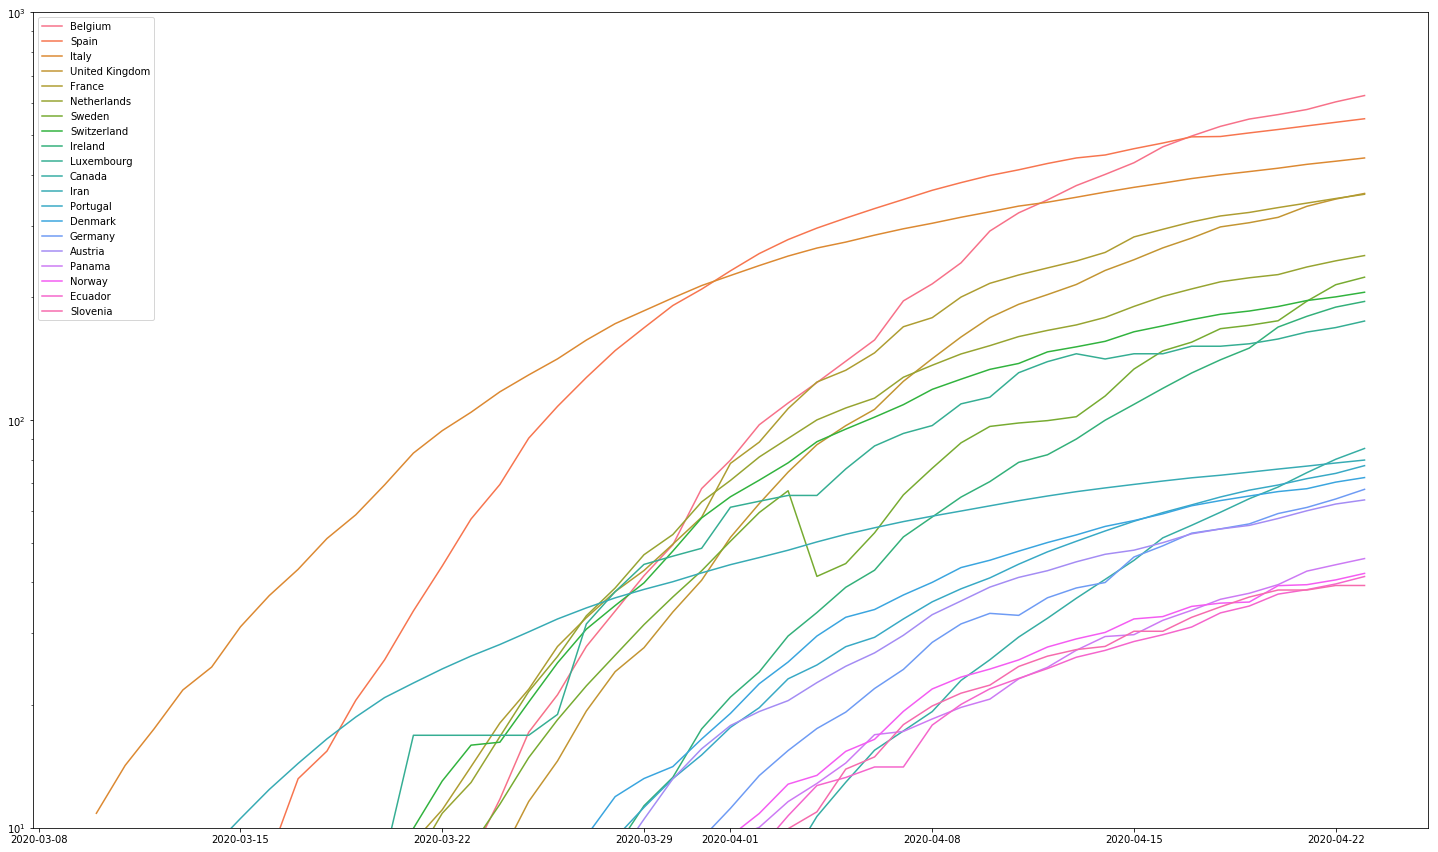

In [4]:
def normalise_by_population(row):
    try:
        return row / world.loc[row.name, "Population"] * 1000000
    except:
        return row * -1

s = deaths.loc[deaths["4/23/20"] > 40]
s = s.iloc[:,[1] + list(range(6,97))]
s = s.groupby("Country/Region").sum()
s = s.apply(normalise_by_population, axis="columns")
s.columns = pd.to_datetime(s.columns)
s = s.loc[:,"2020-03-10":].sort_values(by='4/23/20', ascending=False).iloc[:20,:].transpose()

f, ax = plt.subplots(figsize=(25, 15))
ax.set(yscale="log")
ax.set_ylim(10,1000)
sns.lineplot(data=s, ax=ax, dashes=False)

In [5]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths_US.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed_US.csv
/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv
/kaggle/input/countries-of-the-world/countries of the world.csv
